# Contents    
1. [Introduction](#intro)        
2. [Single Qubit Gates](#single)    
    2.1 [The Hadamard Gate](#hgate)  
    2.2 [The X-Gate](#xgate)  
    2.3 [The Z-Gate](#zgate)  
    2.4 [The Y-Gate](#ygate)
   <!-- More on https://kawaihome.link/jbooks/qcomp-short/q1gates/r.html   -->
3. [Multi-Qubit Gates](#multi-qubit-gates)   
    3.1 [The CX-Gate](#cnot)    
    3.2 [The SWAP Gate](#swap)    
    3.3 [Entangling two qubits](#entangle-2qubits)

# 1. Introduction <a id="intro"></a>

The state of a qubit can be represented in matrix form: 
$$\begin{bmatrix} \cos{\tfrac{\theta}{2}} \\ e^{i\phi}\sin{\tfrac{\theta}{2}} \end{bmatrix}$$
where $\theta$ and $\phi$ are real numbers. 

The state can also be represented in a Bloch sphere in the form: 
$$ |q\rangle = \cos{\tfrac{\theta}{2}}|0\rangle + e^{i\phi}\sin{\tfrac{\theta}{2}}|1\rangle. $$
This provides a three-dimensional representation to visualize the state of the qubit, where the poles corresponds to pure states $|0\rangle$ and $|1\rangle$. 

Before, we go through some of the basic single- and two-qubit gates (Pauli Gates, Hadamard Gate, and CNOT gate), we first import some packages. 

In [ ]:
pip install qiskit-aer  # install this if encountered an error message: "No module named 'qiskit_aer'" while importing the package

In [156]:
from qiskit_aer import Aer as Aer  # import from its own module. 
from qiskit import QuantumCircuit, QuantumRegister,ClassicalRegister, assemble, transpile
from qiskit.quantum_info import Statevector
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram
# from IPython.display import display, Math, Latex

sim = Aer.get_backend('aer_simulator')

# 2. Single Qubit Gates <a id="single"></a> 

## 2.1 The Hadamard Gate <a id="hgate"></a>
The Hadamard gate ($H$-gate) is a fundamental quantum gate. It allows us to create a superposition of $|0\rangle$ and $|1\rangle$ from an initialised state. It has the matrix: 

$$ H = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} $$

When applying the H-gate on $|0\rangle$ and $|1\rangle$, the states are transformed as: 

$$ H|0\rangle = \frac{1}{2}\left(|0\rangle + |1\rangle \right) = |+\rangle $$

$$ H|1\rangle = \frac{1}{2}\left(|0\rangle - |1\rangle \right) = |-\rangle $$

With H-gate, it transformed the qubit from $Z$ basis ($|0\rangle$ and $|1\rangle$) to $X$ basis ($|+\rangle$ and $|-\rangle$). 

Below, we observe the impact of the Hadamard gate on $|0\rangle$.

Initial state is [1.+0.j,0.+0.j]


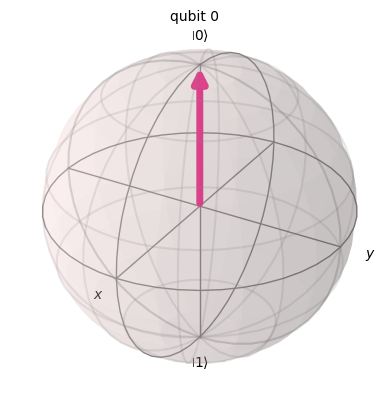

In [84]:
# Initialising a qubit 
q1 = QuantumCircuit(1)

# Visualising the qubit 
q1.save_statevector()
state = sim.run(q1).result().get_statevector() 
print("Initial state is",state.draw('text'))
plot_bloch_multivector(state)

State after applying one H-Gate:  [0.70710678+0.j,0.70710678+0.j]


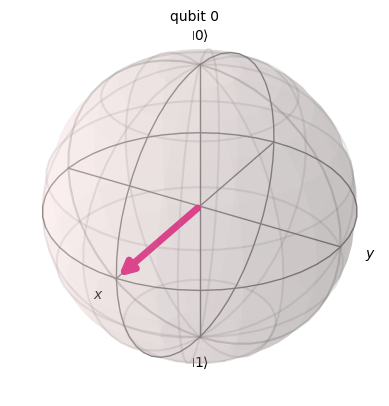

In [85]:
# Applying the H-gate to the qubit 
q1.h(0)

# Visualising the qubit after applying the H-gate
q1.save_statevector(label='q1h')
state = sim.run(q1).result().data()['q1h']
print("State after applying one H-Gate: ",state.draw('text'))
plot_bloch_multivector(state)

To transform a qubit in X basis to Z basis, we can apply the Hadamard gate again. 

$$ H|+\rangle =|0\rangle $$

$$ H|-\rangle = |1\rangle $$

As we can see from below, applying the H-gate again on $|+\rangle$ transforms it back to $|0\rangle$. With this, we can consider the H-gate as a $\pi$ rotation around the Bloch vector `[1,0,1]`. 

State after applying two H-Gate:  [1.-6.123234e-17j,0.+6.123234e-17j]


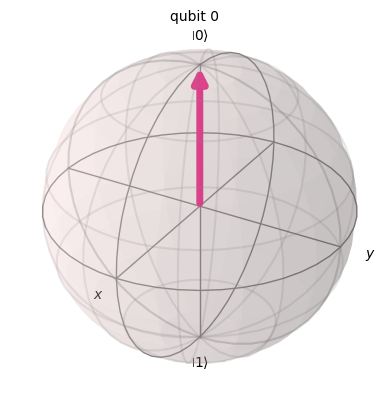

In [86]:
# Applying the second H-gate to the qubit 
q1.h(0)

# Visualising the qubit after applying two H-gates
q1.save_statevector(label='q1hh')
state = sim.run(q1).result().data()['q1hh']
print("State after applying two H-Gate: ",state.draw('text'))
plot_bloch_multivector(state)

## 2.2 The X-Gate <a id="xgate"></a>

Another group of fundamental single-qubit quantum gates is the Pauli gates. Here, we first look into the X-gate, which is represented by the Pauli-X matrix:

$$ X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} = |0\rangle\langle1| + |1\rangle\langle0| $$

To observe the effect of X-gate on a qubit, we apply this to the states $|0\rangle$ and $|1\rangle$ independently. We see that the X-gate switches the amplitude of the states $|0\rangle$ and $|1\rangle$. 

$$ X|0\rangle = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix} = |1\rangle$$
$$ X|1\rangle = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix} = |0\rangle$$

This represents that an X-gate performed a $\pi$ rotation around the x-axis of the Bloch sphere. It also acts similarly to the classical NOT gate.  

To verify this, we first initialise a qubit and then apply an X-gate to it. 

Initial state is [1.+0.j,0.+0.j]
Final state is [0.+0.j,1.+0.j]


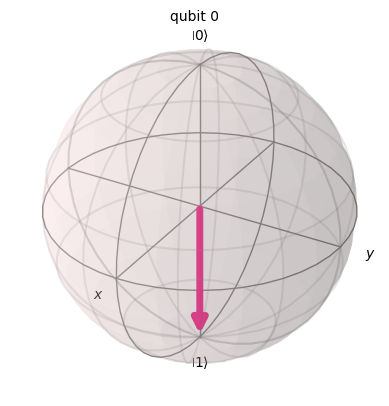

In [81]:
# Initialising a qubit 
q1 = QuantumCircuit(1)

# Obtaining the initial qubit state
q1.save_statevector()
state = sim.run(q1).result().get_statevector() 
print("Initial state is",state.draw('text'))


# Applying the X-gate to the qubit 
q1.x(0)

# Visualising the qubit after applying the X-gate
q1.save_statevector(label='q1x')
state = sim.run(q1).result().data()['q1x']
print("Final state is",state.draw('text'))
plot_bloch_multivector(state)

## 2.3 The Z-Gate <a id="zgate"></a>

Similar to the X-Gate, Z-gate performs a $\pi$ rotation around the z-axis. The matrix is represented as: 

$$ Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} = |0\rangle\langle0| - |1\rangle\langle1| $$

The effect of Z-gate is:
$$ Z|0\rangle = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix} = |0\rangle$$
$$ Z|1\rangle = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} \begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix} = -|1\rangle$$

Note that the negative in front of the $|1\rangle$ is a global phase. To observe Z-gate's rotation effect, we can apply Z-gate on $|+\rangle$. 
$$Z|+\rangle = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} \begin{bmatrix} 1 \\ 1 \end{bmatrix} = \begin{bmatrix} 1 \\ -1 \end{bmatrix} = |-\rangle$$ 

Initial state is [0.70710678+0.j,0.70710678+0.j]


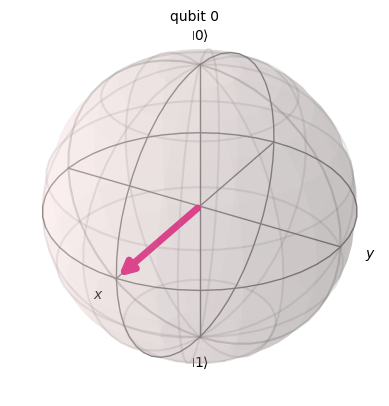

In [102]:
# Initialsing a qubit state |+> 
q1 = QuantumCircuit(1)
q1.h(0)

# Visualising the initial state
q1.save_statevector()
state = sim.run(q1).result().get_statevector() 
print("Initial state is",state.draw('text'))
plot_bloch_multivector(state)

Final state is [ 0.70710678+0.j,-0.70710678+0.j]


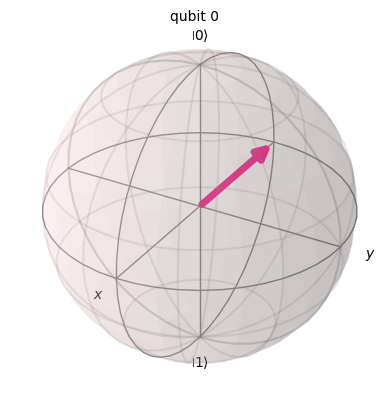

In [103]:
# Applying a Z-gate on |+>
q1.z(0)

# Visialsing the final state
q1.save_statevector(label='q1z')
state = sim.run(q1).result().data()['q1z']
print("Final state is",state.draw('text'))
plot_bloch_multivector(state)

Note that applying the sequence of HZH gates to any qubit is the same as applying an X-gate. 


$$
\begin{align}
HZH &= \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix} 1 & 0 \\ 0 & -1\end{bmatrix} \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}\\
&=\frac{1}{2}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix} 1 & 0 \\ 0 & -1\end{bmatrix} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}\\
&=\frac{1}{2}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix} 1 & 1 \\ -1 & 1\end{bmatrix}\\
&=\frac{1}{2}\begin{bmatrix} 0 & 2 \\ 2 & 0 \end{bmatrix}\\
&=\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\\
&=X\\
\end{align}$$

As we see from the below, after applying the sequence of HZH gate on $|0\rangle$, it indeed returns the qubit as state $|1\rangle$, which verifies the above claim. 

Initial state is [1.+0.j,0.+0.j]


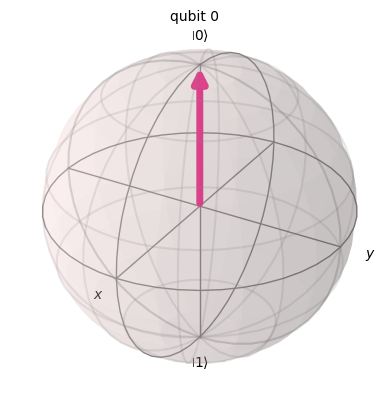

In [112]:
# Initialsing a qubit in state |0> 
q1 = QuantumCircuit(1)

# Visualising the initial state
q1.save_statevector()
state = sim.run(q1).result().get_statevector() 
print("Initial state is",state.draw('text'))
plot_bloch_multivector(state)

Final state is [2.22044605e-16+6.123234e-17j,1.00000000e+00-6.123234e-17j]


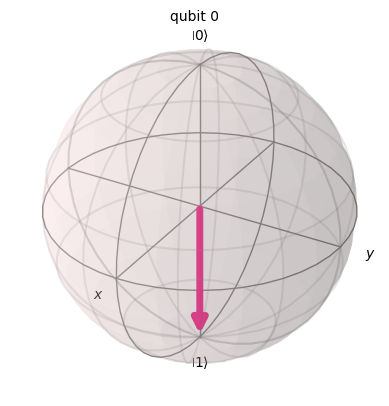

In [113]:
# Applying the X-gate to the qubit 
q1.h(0)
q1.z(0)
q1.h(0)

# Visualising the qubit after applying the X-gate
q1.save_statevector(label='q1hzh')
state = sim.run(q1).result().data()['q1hzh']
print("Final state is",state.draw('text'))
plot_bloch_multivector(state)

## 2.4 The Y-Gate<a id="ygate"></a>

Similarly, the Y-gate performs a $\pi$ rotation about the y-axis, and its matrix is 

$$ Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} = -i|0\rangle\langle1| + i|1\rangle\langle0|$$


The effects of Y-gate on $|0\rangle$ and $|1\rangle$ are: 
$$ Y|0\rangle = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix} = i|1\rangle$$
$$ Y|1\rangle = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}\begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix} = -i|0\rangle$$
where the $i$ and $-i$ coefficients are global phases.

Initial state is [1.+0.j,0.+0.j]


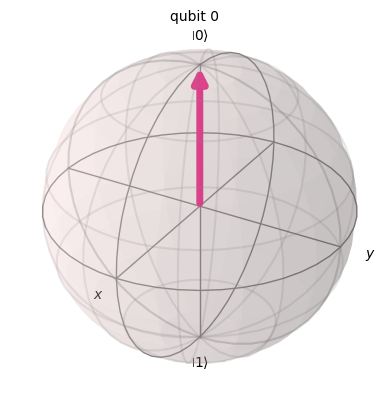

In [126]:
# Initialsing a qubit 
q1 = QuantumCircuit(1)

# Visualising the initial state
q1.save_statevector()
state = sim.run(q1).result().get_statevector() 
print("Initial state is",state.draw('text'))
plot_bloch_multivector(state)

Final state is [0.-0.j,0.+1.j]


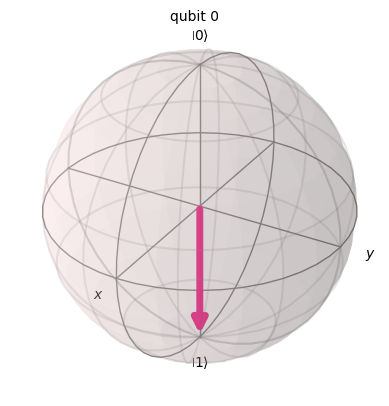

In [109]:
# Applying a Y-gate on |0>
q1.y(0)

# Visialsing the final state
q1.save_statevector(label='q1y')
state = sim.run(q1).result().data()['q1y']
print("Final state is",state.draw('text'))
plot_bloch_multivector(state)

# 3. Multi-Qubit Gates <a id="multi-qubit-gates"></a>

## 3.1 The CX-Gate <a id="cnot"></a>

The CX gate, also known as the CNOT gate, is a conditional gate that performs an X-gate on the target qubit if the control qubit is $|1\rangle$. Its matrix representation is  
$$CNOT =  \begin{bmatrix}  1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0  \end{bmatrix} $$

In Qiskit language, the states are labelled as $|q_1q_0\rangle$. 

When we apply CNOT gate on two qubits, with q_0 as the control and q_1 as the target, then the transformation would be: 
$$ CNOT |00\rangle = |00\rangle  \qquad \qquad \qquad CNOT |10\rangle = |10\rangle$$
$$ CNOT |01\rangle = |11\rangle  \qquad \qquad \qquad CNOT |11\rangle = |01\rangle$$


In [211]:
# Initialising two qubits with state q0 = 1 and q1 = 0 
cr=ClassicalRegister(2)
qr  = QuantumRegister(2)
qc = QuantumCircuit(qr,cr)
qc.x(0)
Statevector(qc).draw('latex')

<IPython.core.display.Latex object>

In [212]:
# Visualising the circuit 
qc.cx(0,1)
qc.draw()

┌───┐     
q14_0: ┤ X ├──■──
       └───┘┌─┴─┐
q14_1: ─────┤ X ├
            └───┘
c13: 2/══════════

In [213]:
# Obtaining the state after CNOT gate is applied to |01>
Statevector(qc).draw('latex')

<IPython.core.display.Latex object>

## 3.2 SWAP Gate <a id='swap'></a>

The SWAP gate allows the exchange of information between qubits. This enables communication and operation between distant qubits. This is essential for hardware systems that do not have all-to-all connectivity, as well as larger systems. This matrix representation of the SWAP gate is: 

$$SWAP =  \begin{bmatrix}  1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1  \end{bmatrix} $$

Performing the SWAP gives the below transformation: 
|Input||Output|
|:-----:|:----:|:----:|
|$|00\rangle$|$\rightarrow$|$|00\rangle$|
|$|01\rangle$|$\rightarrow$|$|10\rangle$|
|$|10\rangle$|$\rightarrow$|$|01\rangle$|
|$|11\rangle$|$\rightarrow$|$|11\rangle$|

Here, we demonstrate the SWAP gate applying on the state $|01\rangle$.

In [181]:
# Initialising two qubits with state q0 = 1 and q1 = 0 
cr=ClassicalRegister(2)
qr  = QuantumRegister(2)
qc = QuantumCircuit(qr,cr)
qc.x(0)
Statevector(qc).draw('latex')

<IPython.core.display.Latex object>

In [182]:
qc.swap(0,1)
qc.measure([0,1],[0,1])
qc.draw()

┌───┐   ┌─┐   
q4_0: ┤ X ├─X─┤M├───
      └───┘ │ └╥┘┌─┐
q4_1: ──────X──╫─┤M├
               ║ └╥┘
c3: 2/═════════╩══╩═
               0  1

### Relationship between SWAP and CNOT gate

We can create an equivalent circuit to  SWAP using the CNOT gate. 

In [215]:
qr = QuantumRegister(2)
qc = QuantumCircuit(qr)
# qc.x(1)
qc.cx(0,1)
qc.cx(1,0)
qc.cx(0,1)
qc.draw()

┌───┐     
q16_0: ──■──┤ X ├──■──
       ┌─┴─┐└─┬─┘┌─┴─┐
q16_1: ┤ X ├──■──┤ X ├
       └───┘     └───┘

The states at each step for any two qubits are: 

|Input|After CNOT1|After CNOT2|After CNOT3|
|:-----:|:----:|:----:|:----:|
|$|00\rangle$|$|00\rangle$|$|00\rangle$|$|00\rangle$|
|$|01\rangle$|$|11\rangle$|$|10\rangle$|$|10\rangle$|
|$|10\rangle$|$|10\rangle$|$|11\rangle$|$|01\rangle$|
|$|11\rangle$|$|01\rangle$|$|01\rangle$|$|11\rangle$|

Taking the input as $|01\rangle$, we can see below that 3 CNOT gates in the above sequence indeed swap the first qubit's information with the second qubit. 

In [ ]:
# Initialising two qubits with state q0 = 1 and q1 = 0 
cr=ClassicalRegister(2)
qr  = QuantumRegister(2)
qc = QuantumCircuit(qr,cr)
qc.x(0)
Statevector(qc).draw('latex')

In [226]:
# Performing 3 CNOT gates
qc.cx(0,1)
qc.cx(1,0)
qc.cx(0,1)
qc.draw()

┌───┐     ┌───┐     
q19_0: ┤ X ├──■──┤ X ├──■──
       └───┘┌─┴─┐└─┬─┘┌─┴─┐
q19_1: ─────┤ X ├──■──┤ X ├
            └───┘     └───┘
c16: 2/════════════════════

In [227]:
Statevector(qc).draw('latex')

<IPython.core.display.Latex object>

## 3.3 Entangling two qubits <a id='entangle-2qubits'></a>

In quantum computing, entanglements are used to exploit quantum mechanics. Therefore, it is
critical to be able to entangle qubits. 

To entangle two qubits, we perform a Hadamard gate and then a CNOT gate. The quantum circuit of it is shown as below. It gives the state vector as $$\frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$$

In [230]:
qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0,1)

qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

In [231]:
Statevector(qc).draw('latex')

<IPython.core.display.Latex object>

The remaining Bell States can also be formed by performing additional X gate(s) before the H gates and the CNOT gate.  

|Bell State|Operation on $q_0$|Operation on $q_1$| 
|:----:|:----:|:----:|
|$\Psi^+=\frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$|$I$|$I$|
|$\Psi^-=\frac{1}{\sqrt{2}}(|00\rangle - |11\rangle)$|$X$|$I$|
|$\Phi^+=\frac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$|$I$|$X$|
|$\Phi^-=\frac{1}{\sqrt{2}}(|01\rangle - |10\rangle)$|$X$|$X$|

where $X$ means X Gate and $I$ means the identity matrix, which do not require any gates. 

Below, we demonstrate how to form the $\Phi^+$ state.


In [236]:
qc = QuantumCircuit(2)

qc.x(1)
qc.h(0)
qc.cx(0,1)

qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     ├───┤┌─┴─┐
q_1: ┤ X ├┤ X ├
     └───┘└───┘

In [237]:
Statevector(qc).draw('latex')

<IPython.core.display.Latex object>